### Iris Dataset

It is difficult to plot datasets with `more` than 2-3 features.  
The data points are `colored` according to the species the iris belons to.  

From the plots, we can see that tha `three` classes are well separated.  
This means that ML model will be able to learn to `separate` them.  

Description: 
  .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
Keys:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Target names:  ['setosa' 'versicolor' 'virginica']
Feature_names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape:  (150, 4)
Data[:2]:
  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]
Target[:2]:  [0 0]
Target[148:]:  [2 2]
X1 shape:  (112, 4)
X2 shape:  (38, 4)
y1 shape:  (112,)
y2 shape:  (38,)


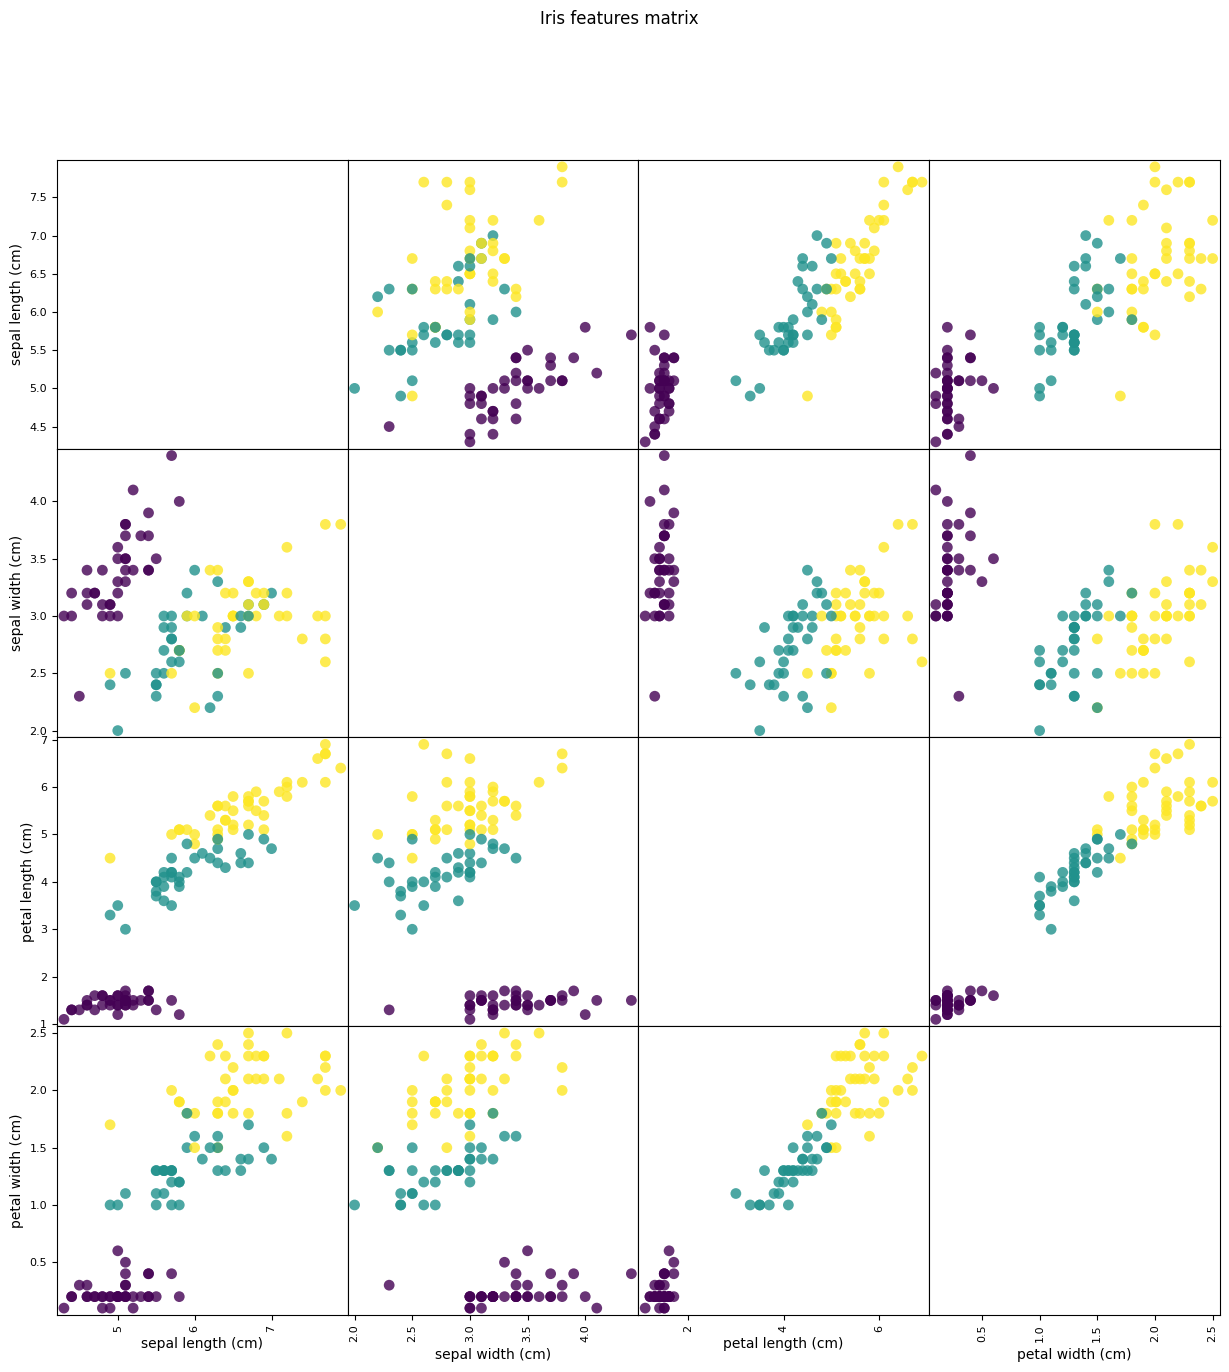

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
dataset = load_iris()

# Training and test data
X1, X2, y1, y2 = train_test_split(
    dataset['data'], dataset['target'], random_state=0 # fixed seed
)


# Describe dataset  
print('Description: \n ', dataset['DESCR'][:193])
print('Keys: ', dataset.keys())
print('Target names: ', dataset['target_names'])
print('Feature_names: ', dataset['feature_names'])
print('Shape: ', dataset['data'].shape) # number of samples, features
print('Data[:2]:\n ', dataset['data'][:2])
print('Target[:2]: ', dataset['target'][:2])
print('Target[148:]: ', dataset['target'][148:]) # species are encoded, 0 to 2
print('X1 shape: ', X1.shape)
print('X2 shape: ', X2.shape)
print('y1 shape: ', y1.shape)
print('y2 shape: ', y2.shape)


# Plot features matrix
df = pd.DataFrame(X1, columns=dataset.feature_names)
pd.plotting.scatter_matrix(
    df, c=y1, figsize=(15, 15), marker='o', 
    s=60, alpha = .8, diagonal='none'
)
plt.suptitle('Iris features matrix')
plt.show()

### Make Predictions

We build the actual model using `KNeighborsClassifier` algorithm.  
We predict the species of a `new` iris based on known measurements (length and width of petals).  
Our model predicts that this new iris belongs to `class` 0, meaning its species is setosa.  

Prediction class: [0]
Predicted target: ['setosa']


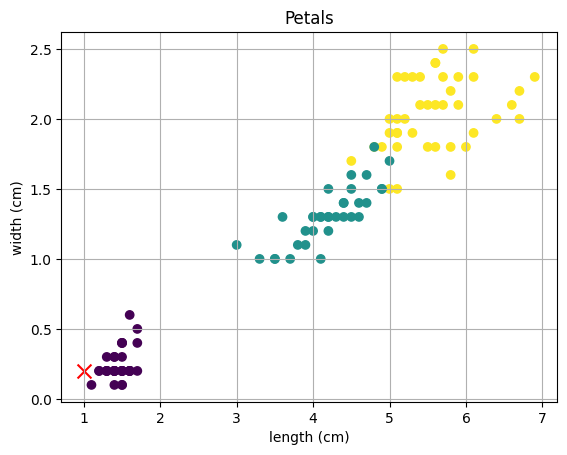

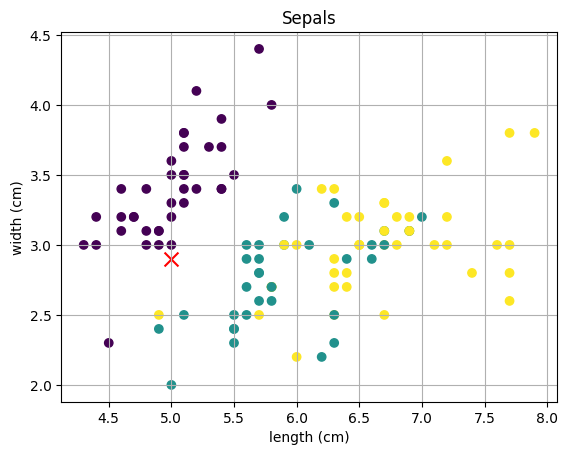

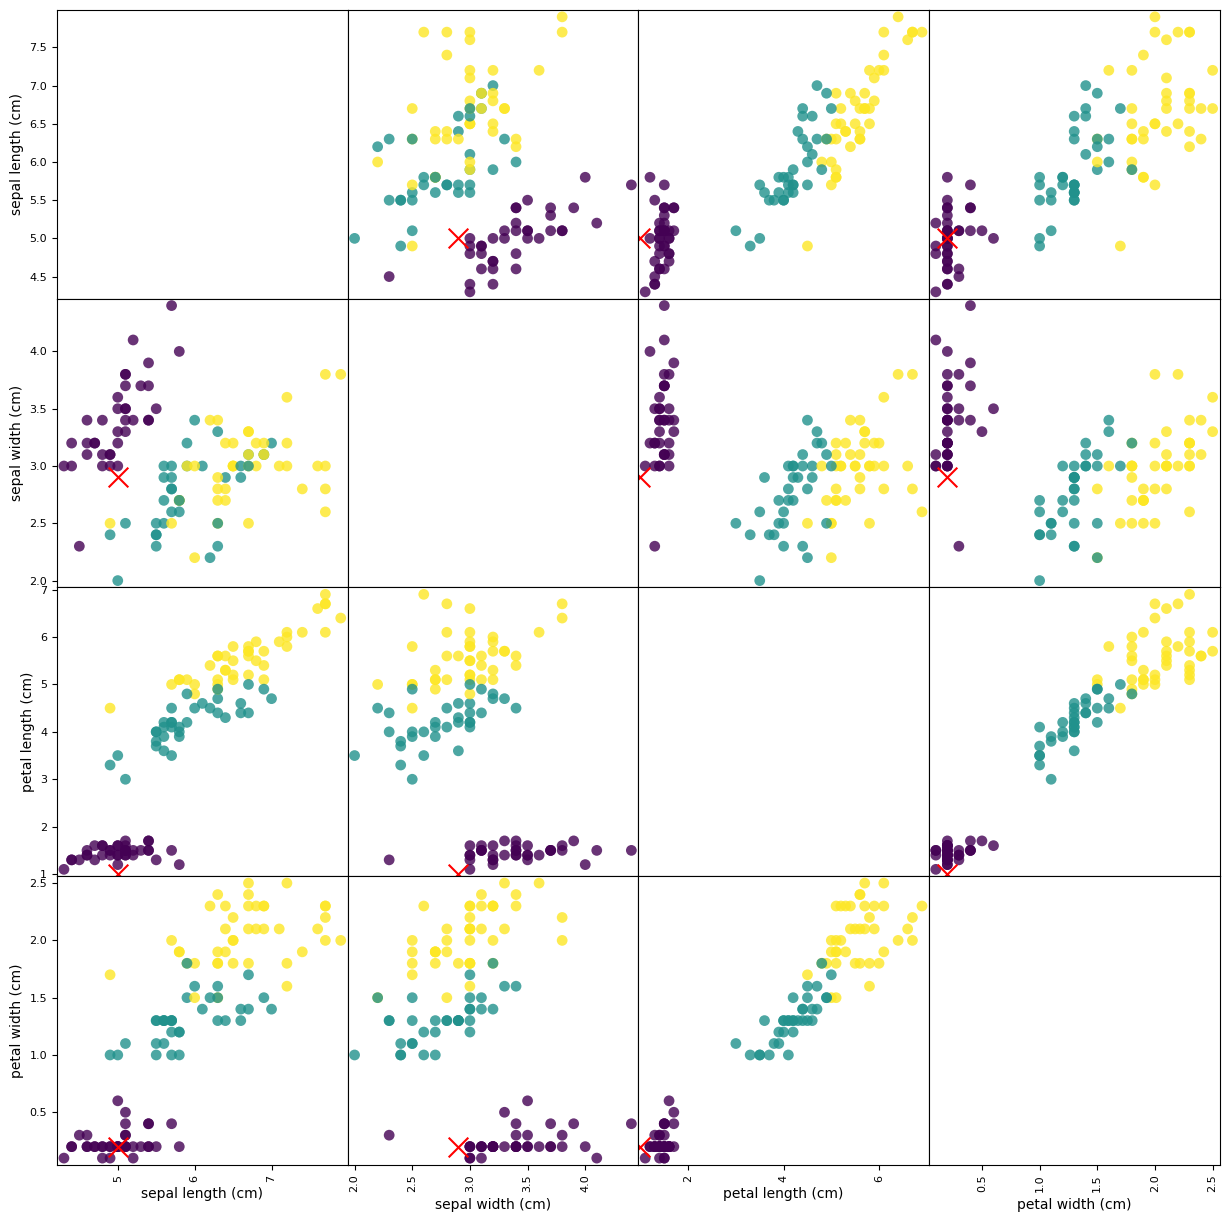

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Training and test datasets
dataset = load_iris()
X1, X2, y1, y2 = train_test_split(
    dataset['data'], dataset['target'], random_state=0
)

# Learn model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X1, y1)

# New iris prediction
X_new = np.array([5, 2.9, 1, 0.2]).reshape(1, 4)
y_new = knn.predict(X_new)

print("Prediction class:", y_new)
print("Predicted target:", dataset['target_names'][y_new])


# Training data frame
df = pd.DataFrame(X1, columns=dataset.feature_names)

# Plot iris petal
fig, ax = plt.subplots()
ax.set_title("Petals")
ax.set_xlabel('length (cm)')
ax.set_ylabel('width (cm)')
ax.scatter(df['petal length (cm)'], df['petal width (cm)'], c=y1)
ax.scatter(X_new[0][2], X_new[0][3], c='r', marker='x', s=100)
ax.grid()

# Plot iris sepal
fig, ax = plt.subplots()
ax.set_title("Sepals")
ax.set_xlabel('length (cm)')
ax.set_ylabel('width (cm)')
ax.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=y1)
ax.scatter(X_new[0][0], X_new[0][1], c='r', marker='x', s=100)
ax.grid()

# Plot the new point on the scatter matrix plot
axes = pd.plotting.scatter_matrix(
    df, c=y1, figsize=(15, 15), marker='o', 
    s=60, alpha = .8, diagonal='none'
)
for i in range(4):
    for j in range(4):
        if i == j:
            continue
        ax = axes[i, j]
        ax.scatter(X_new[:, j], X_new[:, i], c='r', marker='x', s=200)

plt.show()


### Model Evaluation

We make a prediction for each iris in the `test` dataset and compare it against its known label.  
For this model the we can make the right prediction for `97%` for irises in the test dataset.  

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

dataset = load_iris()
X1, X2, y1, y2 = train_test_split(
    dataset['data'], dataset['target'], random_state=0
)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X1, y1)

y_new = knn.predict(X2)         # predictions on test dataset
score1 = np.mean(y_new == y2)   # get score using average, OR
score2 = knn.score(X2, y2)      # knn object

print("Score using mean():", round(score1, 2))
print("Score using knn object:", round(score2, 2))

Score using mean(): 0.97
Score using knn object: 0.97
